In [53]:
from core.data import *
from core.visualization import *
from core.analysis import *

import numpy as np

In [54]:
x_train, y_train = load_x('data/x_train.h5'), load_y('data/y_train.csv')

Started loading file data/x_train.h5
Finished loading the file.
Started loading file data/y_train.csv
Finished loading the file.


In [37]:
x = x_train.reshape((946*40, 7, 500))
correlations = np.zeros((len(x), 7, 7))

for e in range(len(x)):
    for i in range(7):
        for j in range(7):
            if i == j:
                correlations[e, i, j] = float('-inf')
            else:
                correlations[e, i, j] = np.correlate(x[e, i], x[e, j])

In [41]:
avg_correlation = np.mean(correlations, axis=0)
print(np.argmax(avg_correlation, axis=1))

[4 5 3 2 0 1 2]


In [52]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

# other method
max_correlation = np.argmax(correlations, axis=2)
most_common = [Most_Common(max_correlation[:, i]) for i in range(7)]
# decaler les indices pour plus de lisibité (1 à 7)
print(np.array(most_common) + 1)

[5 6 4 3 1 2 2]


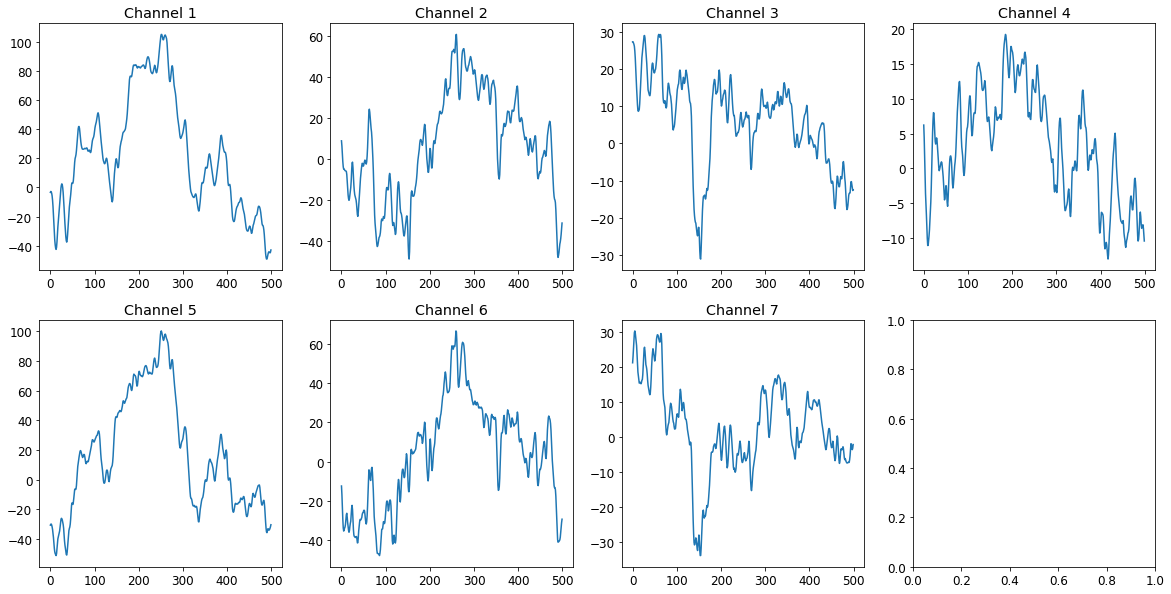

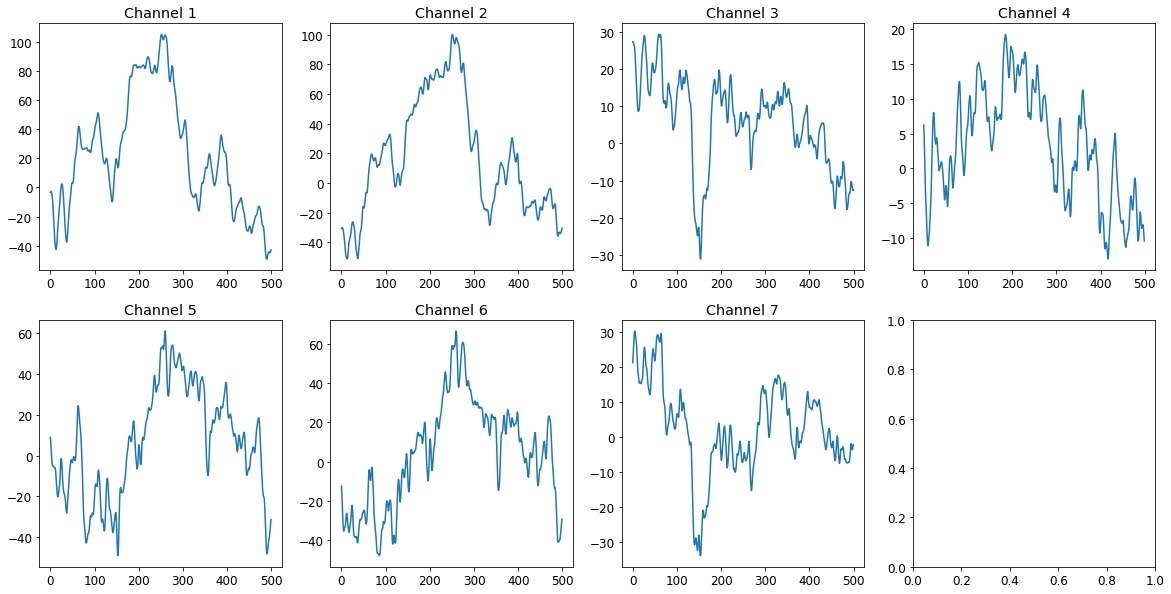

In [59]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

i, j = 4, 10

x_swaped = swap_correlated_channels(x_train)
plot_eeg_sample(x_train[i, j])
plot_eeg_sample(x_swaped[i, j])